## 데이터 로드

In [2]:
import pandas as pd

#데이터 로드 -> 커널 : venv
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

## 데이터 확인

In [ ]:
train_df.head()
train_df.info()
train_df.describe()

## EDA

In [3]:
import pandas as pd
import sweetviz as sv

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')
sv.config_parser.read_string("[General]\nuse_cjk_font=1")

df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

compare_report = sv.compare([df_train,'Train'],[df_test,'Test'],target_feat='가격')
compare_report.show_html(r'./image/EDA_Report.html') #image폴더만들기

Feature: 가격 (TARGET)                         |▊         | [  8%]   00:00 -> (00:00 left)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:02 -> (00:00 left)  


Report ./image/EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# 중복값 확인
train_df[train_df.duplicated(keep=False)]

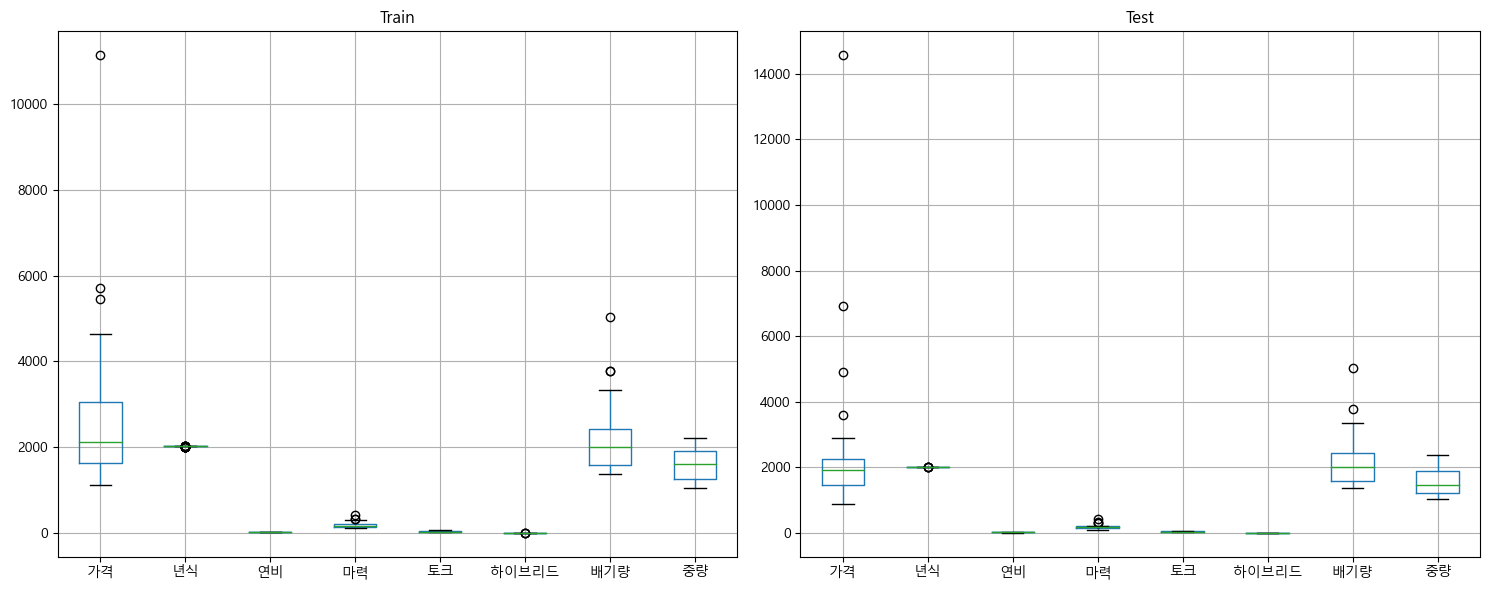

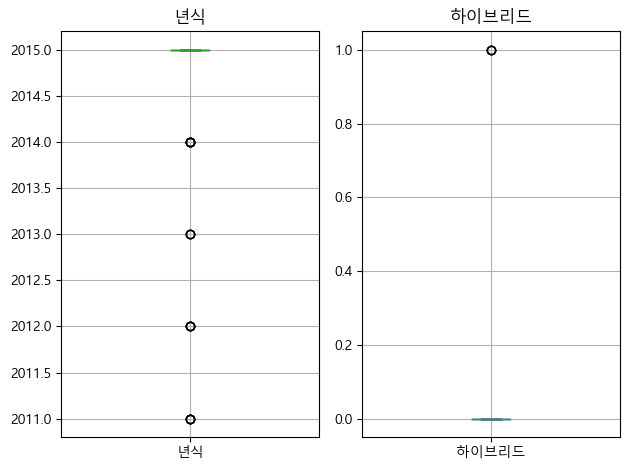

In [5]:
# 이상치 확인
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.rc('font', family = "Malgun Gothic") #한글사용
# plt.rc('font', size=30) 
# plt.rc('axes', labelsize=50)
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.subplot(1, 2, 1)                # nrows=2, ncols=1, index=1
train_df.boxplot()
plt.title('Train')     # 차트 제목 생성

plt.subplot(1, 2, 2)                # nrows=2, ncols=1, index=2
test_df.boxplot()
plt.title('Test')     # 차트 제목 생성

plt.tight_layout()
plt.show()

plt.subplot(1, 2, 1)                # nrows=2, ncols=1, index=1
train_df[['년식']].boxplot()
plt.title('년식')     # 차트 제목 생성

plt.subplot(1, 2, 2)                # nrows=2, ncols=1, index=2
train_df[['하이브리드']].boxplot()
plt.title('하이브리드')     # 차트 제목 생성

plt.tight_layout()
plt.show()


In [16]:
# 인코딩 종류 파악 / Dtype => object
train_df.head()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   가격      71 non-null     int64  
 1   년식      71 non-null     int64  
 2   종류      71 non-null     object 
 3   연비      71 non-null     float64
 4   마력      71 non-null     int64  
 5   토크      71 non-null     float64
 6   연료      71 non-null     object 
 7   하이브리드   71 non-null     int64  
 8   배기량     71 non-null     int64  
 9   중량      71 non-null     int64  
 10  변속기     71 non-null     object 
dtypes: float64(2), int64(6), object(3)
memory usage: 6.2+ KB


```
1.결측치 : 미존재
2.중복값 : Train_df 중복값 1개 존재
3.이상치 : 가격 존재
    - 가격 : 적은 수이므로 잠정적으로 수용하는 것으로 판단
    - 년식, 마력, 하이브리드, 배기량 : 범주형이기 때문에 이상치 X
4.인코딩
    - 종류, 연료, 변속기 인코딩 필요(문자형) => 인코딩 필요
    - 년식, 하이브리드(범주형) => 인코딩 일단 대기
5.Feature & Label Associations(피처와 레이블 관계성) : 가격이 레이블 / 나머지는 피처 => heatmap분석 확인해보니 관계성이 있음 => 학습은 가능할 듯
5.스케일링: 아직모름
```

In [34]:
# 가공 : 중복값 처리
print(f'중복제거전 : {len(train_df)}')
train_df.drop_duplicates(inplace = True) 
print(f'중복제거후 : {len(train_df)}')

중복제거전 : 71
중복제거후 : 70


In [36]:
# 1차 가공 후 데이터 저장
train_df.to_csv('./data/train_pre.csv', index=False) # index=False => Unnamed:0 컬럼 출력 안함

In [38]:
pd.read_csv('./data/train_pre.csv')

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1885,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2190,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,1135,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,1645,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,1960,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...,...
65,3802,2015,중형,8.5,290,34.8,가솔린,0,3342,1901,자동
66,1270,2012,소형,13.3,108,13.9,가솔린,0,1396,1040,자동
67,2430,2015,준중형,12.8,186,41.0,디젤,0,1995,1665,자동
68,2870,2015,중형,17.7,156,19.3,가솔린,1,1999,1585,자동
